date, model_number, batteries, battery_power_rating, wire_comm_tech, conn_tech, 
is_gps, display_tech, other_display_features, other_cam_features, from_factor,

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Подготовка данных для анализа

In [181]:
data = pd.read_csv('../csv_files/items_new.csv')
data.columns

Index(['phone_full_name', 'phone_review_rating', 'phone_rate_number',
       'phone_sale_price', 'phone_list_price', 'phone_discount', 'phone_brand',
       'phone_dim', 'phone_weight', 'phone_ASIN', 'phone_model_numer',
       'phone_batteries', 'phone_os', 'phone_ram', 'phone_wire_com_tech',
       'phone_conn_tech', 'phone_is_GPS', 'phone_special_features',
       'phone_display_tech', 'phone_other_display_features',
       'phone_human_int_input', 'phone_scanner_res',
       'phone_other_cam_features', 'phone_from_factor', 'phone_color',
       'phone_batt_power_rating', 'phone_set', 'phone_manufacturer',
       'phone_date', 'phone_mem_storage_cap',
       'phone_standing_screen_display_size', 'phone_ram_memory_installed_size',
       'phone_cust_rev_5_perc', 'phone_cust_rev_4_perc',
       'phone_cust_rev_3_perc', 'phone_cust_rev_2_perc',
       'phone_cust_rev_1_perc', 'phone_cust_say'],
      dtype='object')

In [182]:
data.replace(['Not availible', 'Sorry bro'], None, inplace=True)

In [183]:
columns_to_keep = [
    'phone_date', 'phone_model_numer', 'phone_batteries', 'phone_batt_power_rating',
    'phone_wire_com_tech', 'phone_conn_tech', 'phone_is_GPS', 'phone_display_tech',
    'phone_other_display_features', 'phone_other_cam_features', 'phone_from_factor', 
    'phone_sale_price', 'phone_brand', 'phone_manufacturer'
]
data = data[columns_to_keep]
data.head()

,phone_date,phone_model_numer,phone_batteries,phone_batt_power_rating,phone_wire_com_tech,phone_conn_tech,phone_is_GPS,phone_display_tech,phone_other_display_features,phone_other_cam_features,phone_from_factor,phone_sale_price,phone_brand,phone_manufacturer
0,"March 19, 2024",SAMSUNG A55,1 Lithium Polymer batteries required. (included),5000 Watt Hours,"Bluetooth, Cellular, Wi-Fi, NFC",NFC,True,None,Wireless,Front,Smartphone,$375.90,SAMSUNG,Samsung Electronics
1,"February 3, 2024",S256VL,1 Lithium Polymer batteries required. (included),None,None,"USB, Bluetooth V 5.1",True,None,Wireless,"Rear, Front",Bar,$205.84,Tracfone,Samsung
2,"January 1, 2022",A166M/DS,1 Lithium Ion batteries required. (included),5000 Milliamp Hours,None,"2G, 3G, 4G, 5G",True,None,Wireless,None,Bar,$213.99,SAMSUNG,SAMSUNG
3,"March 8, 2023",SM-A145M/DS,1 Lithium Ion batteries required. (included),5000 Milliampere Hour (mAh),"Cellular, Wi-Fi",Wi-Fi,True,None,Wireless,Front,Smartphone,$199.99,SAMSUNG,Samsung Electronics
4,"August 28, 2024",XT2415V,1 Lithium Polymer batteries required. (included),3,Cellular,"Bluetooth, Wi-Fi, GSM/UMTS/LTE",True,None,Wireless,50MP + 8MP,Bar,$149.00,Tracfone,MOTOROLA INC


In [184]:
print(data.shape)

(945, 14)


In [185]:
# Filter rows where 'phone_sale_price' matches a dollar amount (e.g., $123.45)
data = data[data['phone_sale_price'].str.match(r'^\$\d+(\.\d{2})?$', na=False)]
data.reset_index(drop=True, inplace=True)
data.head()

,phone_date,phone_model_numer,phone_batteries,phone_batt_power_rating,phone_wire_com_tech,phone_conn_tech,phone_is_GPS,phone_display_tech,phone_other_display_features,phone_other_cam_features,phone_from_factor,phone_sale_price,phone_brand,phone_manufacturer
0,"March 19, 2024",SAMSUNG A55,1 Lithium Polymer batteries required. (included),5000 Watt Hours,"Bluetooth, Cellular, Wi-Fi, NFC",NFC,True,None,Wireless,Front,Smartphone,$375.90,SAMSUNG,Samsung Electronics
1,"February 3, 2024",S256VL,1 Lithium Polymer batteries required. (included),None,None,"USB, Bluetooth V 5.1",True,None,Wireless,"Rear, Front",Bar,$205.84,Tracfone,Samsung
2,"January 1, 2022",A166M/DS,1 Lithium Ion batteries required. (included),5000 Milliamp Hours,None,"2G, 3G, 4G, 5G",True,None,Wireless,None,Bar,$213.99,SAMSUNG,SAMSUNG
3,"March 8, 2023",SM-A145M/DS,1 Lithium Ion batteries required. (included),5000 Milliampere Hour (mAh),"Cellular, Wi-Fi",Wi-Fi,True,None,Wireless,Front,Smartphone,$199.99,SAMSUNG,Samsung Electronics
4,"August 28, 2024",XT2415V,1 Lithium Polymer batteries required. (included),3,Cellular,"Bluetooth, Wi-Fi, GSM/UMTS/LTE",True,None,Wireless,50MP + 8MP,Bar,$149.00,Tracfone,MOTOROLA INC


In [186]:
print(data.shape)

(785, 14)


In [187]:
data['price_num'] = pd.to_numeric(
	data['phone_sale_price'].replace('[\$,]', '', regex=True), errors='coerce'
)

data['price_num'] = data['price_num'].astype('float')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\2108597956.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['phone_sale_price'].replace('[\$,]', '', regex=True), errors='coerce'


In [188]:
data.price_num.isna().unique()

array([False])

Сразу добавим логарифм цены

In [189]:
data['log_price_num'] = np.log1p(data['price_num'])

#### Дата

Будем смотреть на зависимость цены телефона от года выпуска, поэтому конкретная дата нас мало интересует.

In [122]:
data['year'] = pd.to_datetime(data['phone_date'], errors='coerce').dt.year
nan_count = data['year'].isna().sum()
print(f"Количество NaN в колонке 'year': {nan_count}")
print(data['year'].unique())
print(data['year'].dtype)

Количество NaN в колонке 'year': 92
[2024. 2022. 2023. 2021. 2025.   nan 2009. 2020. 2015. 2019. 2011. 2018.
 2016. 2017. 2014. 2005. 2012. 2004.]
float64


In [124]:
data['year'] = data['year'].astype('Int64')

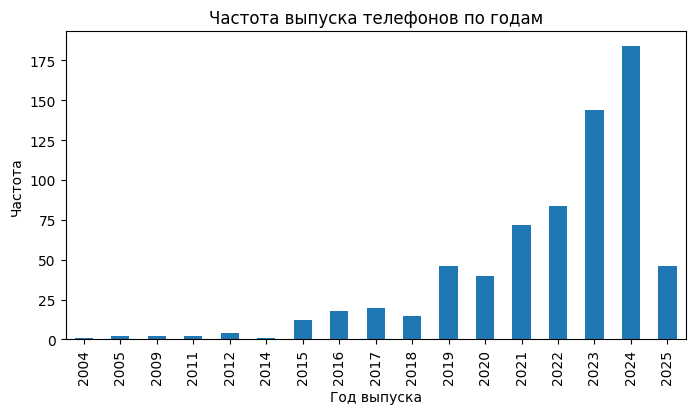

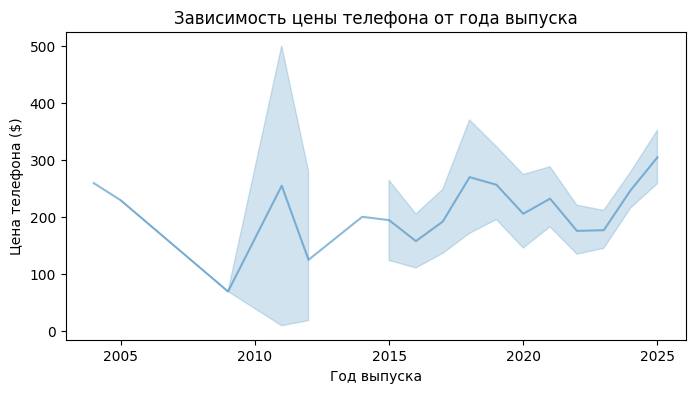

In [125]:
# Построим barplot: частота по годам выпуска
year_counts = data['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по годам')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data, x = 'year', y='price_num', alpha=0.5)
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска')
plt.show()

Посмотрим еще на логарифм цены:

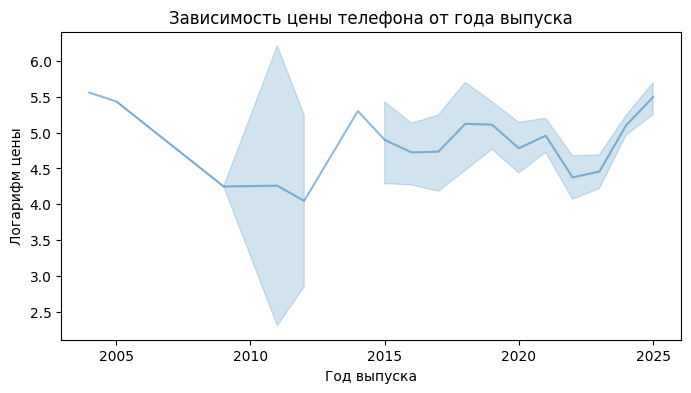

In [126]:
# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data, x = 'year', y='log_price_num', alpha=0.5)
plt.xlabel('Год выпуска')
plt.ylabel('Логарифм цены')
plt.title('Зависимость цены телефона от года выпуска')
plt.show()

По логарифму цены для всех компаний и по статистике частот видно, что, то что было выпущено до 2015 года - скорее выбросы.

На выбросы в данном случае можно поставить дамми переменную.

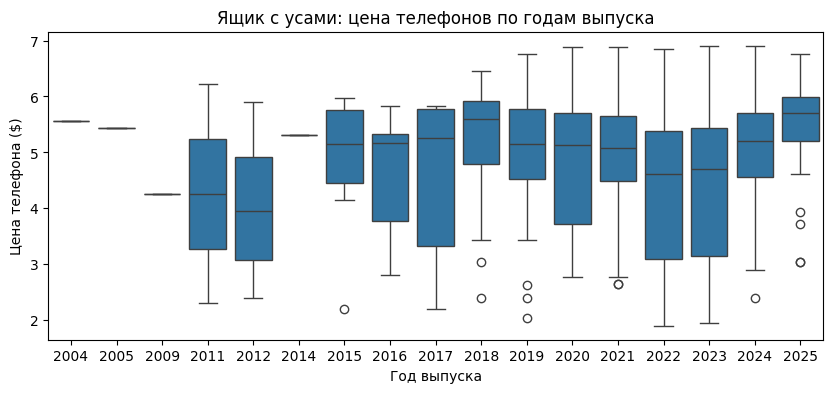

In [127]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='year', y='log_price_num', data=data)
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Ящик с усами: цена телефонов по годам выпуска')
plt.show()

Посмотрим на зависимость цены от года выпуска внутри одной компании-производителя

In [128]:
brand_counts = data['phone_brand'].value_counts()
print(brand_counts)

phone_brand
SAMSUNG                      384
Motorola                      92
Xiaomi                        79
Apple                         67
Nokia                         33
Samsung                       24
TracFone                      22
Tracfone                      18
Sony                          15
Samsung Electronics           11
BlackBerry                    11
Panasonic                      6
T-Mobile                       4
realme                         3
LG                             1
Samsung Electronics Store      1
Name: count, dtype: int64


Samsung

In [129]:
data_sams = data[data['phone_brand'].isin(['SAMSUNG', 'Samsung', 'Samsung Electronics', 'Samsung Electronics Store'])]

In [130]:
data_sams.shape

(420, 17)

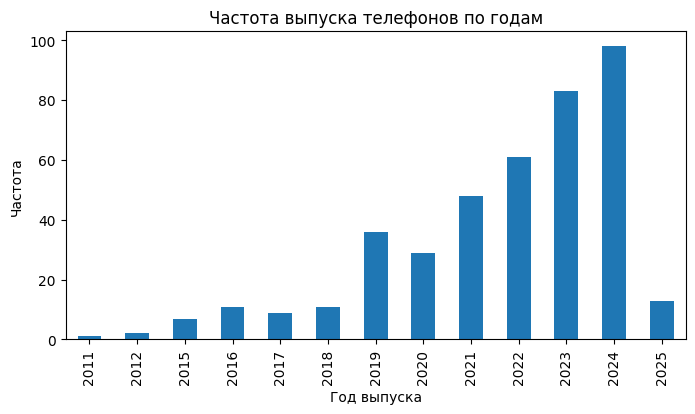

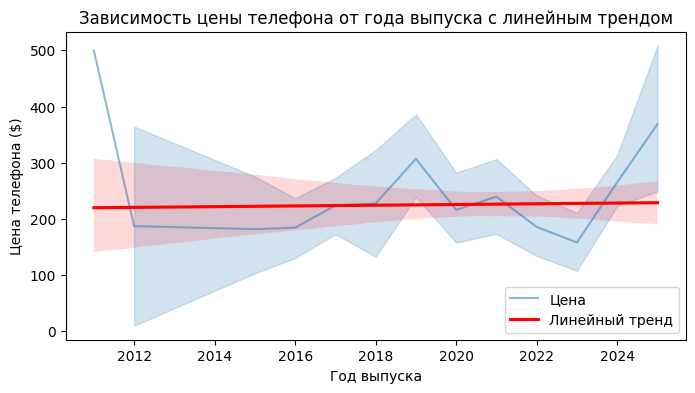

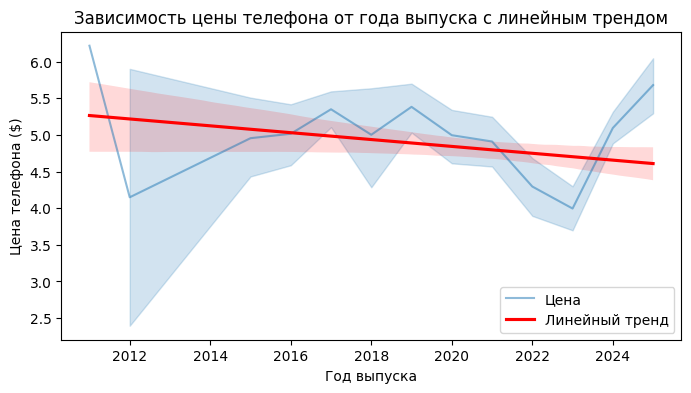

In [131]:
# Построим barplot: частота по годам выпуска
year_counts = data_sams['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по годам')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_sams, x='year', y='price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_sams, x='year', y='price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

# График зависимости логарифма цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_sams, x='year', y='log_price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_sams, x='year', y='log_price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

Tracfone

In [132]:
data_tracfone = data[data['phone_brand'].isin(['TracFone', 'Tracfone'])]
data_tracfone.shape

(40, 17)

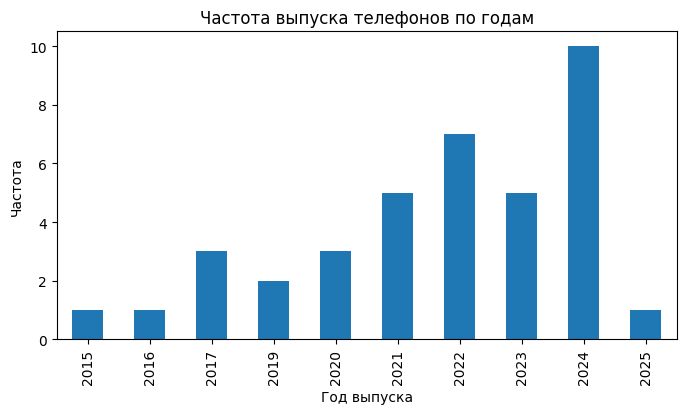

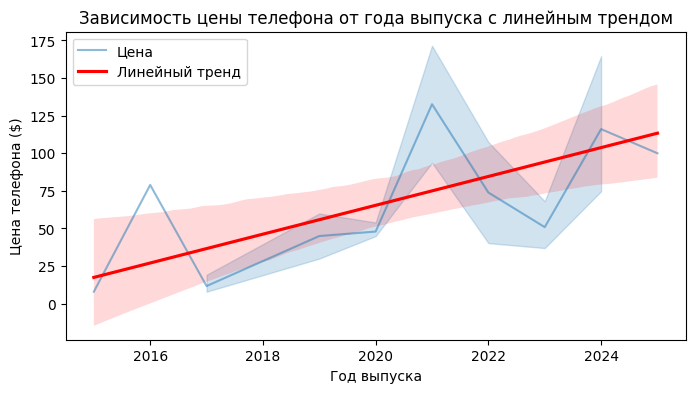

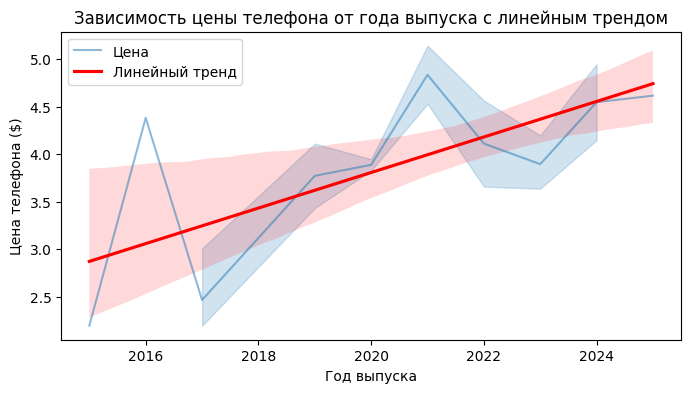

In [133]:
# Построим barplot: частота по годам выпуска
year_counts = data_tracfone['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по годам')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_tracfone, x='year', y='price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_tracfone, x='year', y='price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

# График зависимости логарифма цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_tracfone, x='year', y='log_price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_tracfone, x='year', y='log_price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

Motorola

(92, 17)


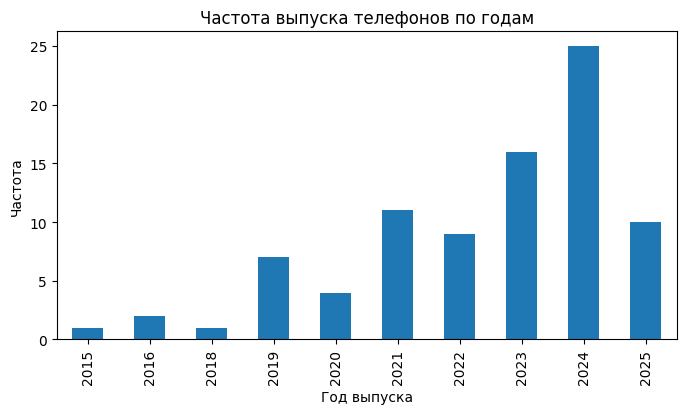

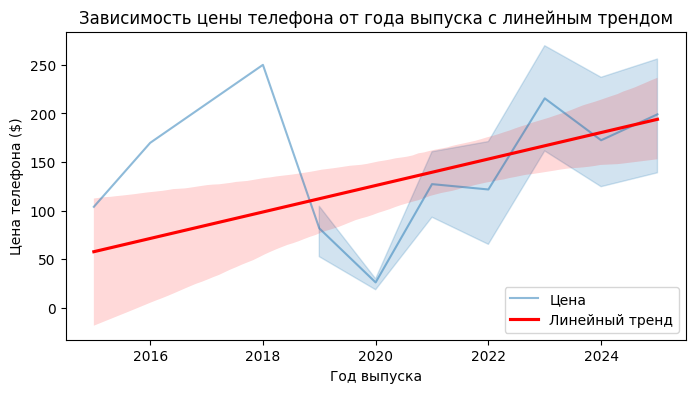

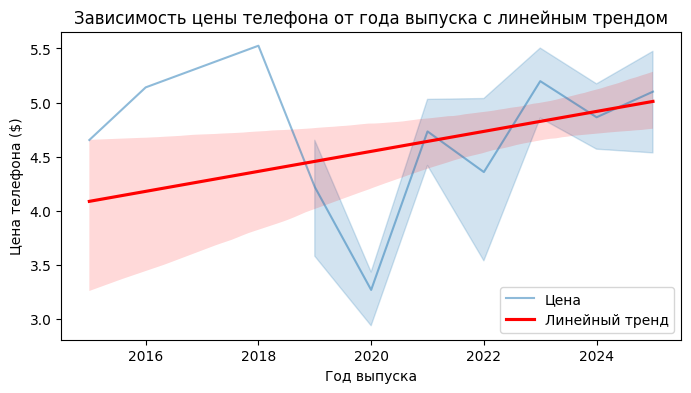

In [134]:
data_brand = data[data['phone_brand'].isin(['Motorola'])]
print(data_brand.shape)

# Построим barplot: частота по годам выпуска
year_counts = data_brand['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по годам')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_brand, x='year', y='price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_brand, x='year', y='price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

# График зависимости логарифма цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_brand, x='year', y='log_price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_brand, x='year', y='log_price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()


Xiaomi

(79, 17)


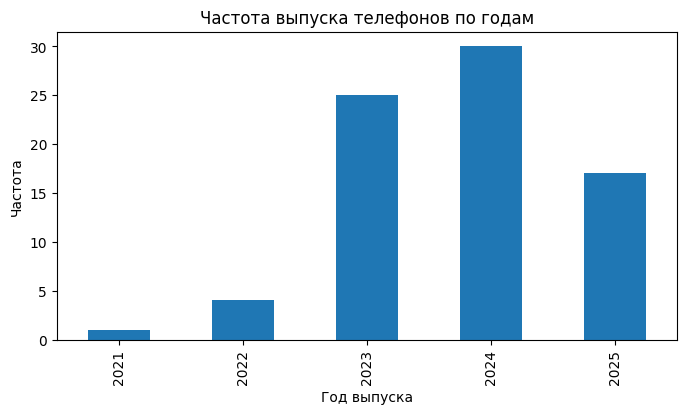

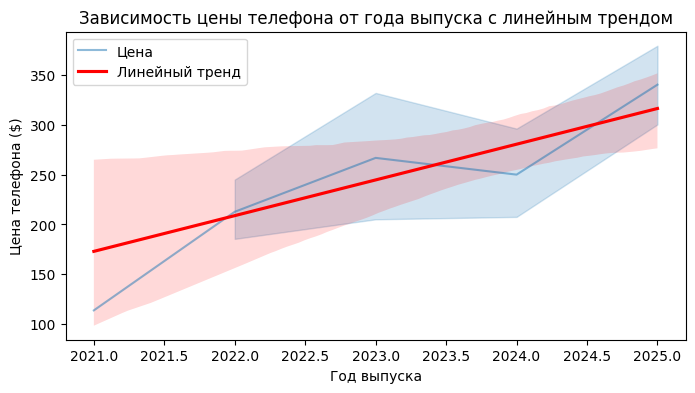

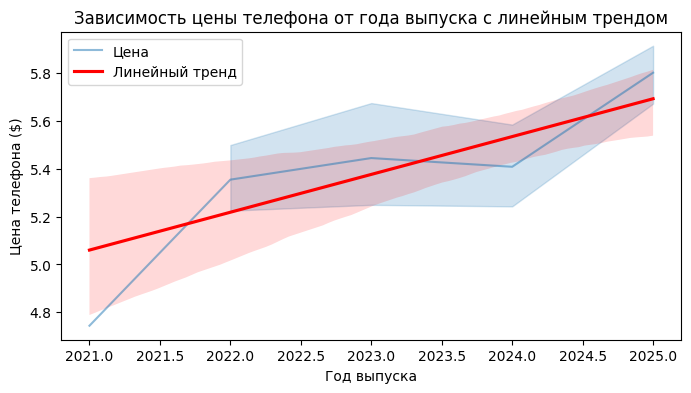

In [135]:
data_brand = data[data['phone_brand'].isin(['Xiaomi'])]
print(data_brand.shape)

# Построим barplot: частота по годам выпуска
year_counts = data_brand['year'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.title('Частота выпуска телефонов по годам')
plt.show()

# График зависимости цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_brand, x='year', y='price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_brand, x='year', y='price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()

# График зависимости логарифма цены от года выпуска
plt.figure(figsize=(8, 4))
sns.lineplot(data=data_brand, x='year', y='log_price_num', alpha=0.5, label='Цена')
sns.regplot(data=data_brand, x='year', y='log_price_num', scatter=False, color='red', label='Линейный тренд')
plt.xlabel('Год выпуска')
plt.ylabel('Цена телефона ($)')
plt.title('Зависимость цены телефона от года выпуска с линейным трендом')
plt.legend()
plt.show()


#### Конкретная модель - телефоны внутри модели могут отличаться, например, по количеству памяти

In [167]:
# Размер выборки
print(f"Размер выборки: {data.shape[0]}")

# Количество уникальных моделей
unique_models = data['phone_model_numer'].nunique(dropna=True)
print(f"Уникальных моделей: {unique_models}")

# Количество NaN в уникальных моделях
nan_models = data['phone_model_numer'].isna().sum()
print(f"Количество NaN в моделях: {nan_models}")

Размер выборки: 785
Уникальных моделей: 510
Количество NaN в моделях: 39


Такое как признак использовать не получится

#### Батарея телефона - batteries, battery_power_rating

In [168]:
for col in ['phone_batteries', 'phone_batt_power_rating']:
    unique_count = data[col].nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

Колонка 'phone_batteries': уникальных значений = 32, NaN = 287
Колонка 'phone_batt_power_rating': уникальных значений = 57, NaN = 437


In [141]:
print(data['phone_batteries'].unique())

['1 Lithium Polymer batteries required. (included)'
 '1 Lithium Ion batteries required. (included)' None
 '2 Lithium Polymer batteries required. (included)'
 '1 A batteries required. (included)' '1 Lithium Ion batteries required.'
 '1 P76 batteries required. (included)'
 '1 CR5 batteries required. (included)'
 '1 Lithium Polymer batteries required.' '1 LR44 batteries required.'
 '1 AAA batteries required. (included)' '1 A batteries required.'
 '1 Nonstandard Battery batteries required.'
 '1 Nonstandard Battery batteries required. (included)'
 '1 9V batteries required. (included)'
 '\u200e1 Lithium Ion batteries required. (included)'
 '\u200e1 Lithium Ion batteries required.'
 '1 D batteries required. (included)' '\u200e1 A batteries required.'
 '1 CR2 batteries required. (included)'
 '1 Lithium Metal batteries required. (included)'
 '4 AAA batteries required. (included)'
 '1 Lithium Metal batteries required.' '1 C batteries required.'
 '\u200e1 CR5 batteries required. (included)'
 '1 P

In [169]:
import pandas as pd
import re

def parse_battery(battery_str):
    if pd.isna(battery_str) or 'No' in str(battery_str):
        return pd.Series([0, 'unknown', False])
    s = battery_str.replace('\u200e', '').strip()
    count = int(re.search(r'\d+', s).group()) if re.search(r'\d+', s) else 0
    included = '(included)' in s
    types = ['Lithium Ion', 'Lithium Polymer', 'Lithium Metal', 'AA', 'AAA', 'A', 'C', 'D', '9V', 'CR5', 'CR2', 'P76', 'LR44', 'LR41', 'Nonstandard Battery', 'Product Specific']
    btype = next((t for t in types if t in s), 'other')
    return pd.Series([count, btype, included])

data[['battery_count', 'battery_type', 'battery_included']] = data['phone_batteries'].apply(parse_battery)

# Кастомная группировка:
def battery_group(btype):
    if btype in ['Lithium Ion', 'Lithium Polymer']:
        return 'rechargeable_lithium'
    elif btype in ['Lithium Metal', 'CR5', 'CR2']:
        return 'nonrechargeable_lithium'
    elif btype in ['AA', 'AAA', 'A', 'C', 'D', '9V', 'P76', 'LR44', 'LR41']:
        return 'alkaline'
    elif btype in ['Nonstandard Battery', 'Product Specific']:
        return 'custom'
    elif btype == 'other':
        return 'other'
    else:
        return 'unknown'
    
data['battery_group'] = data['battery_type'].apply(battery_group)


Можно заметить, что очень много None в этих признаках

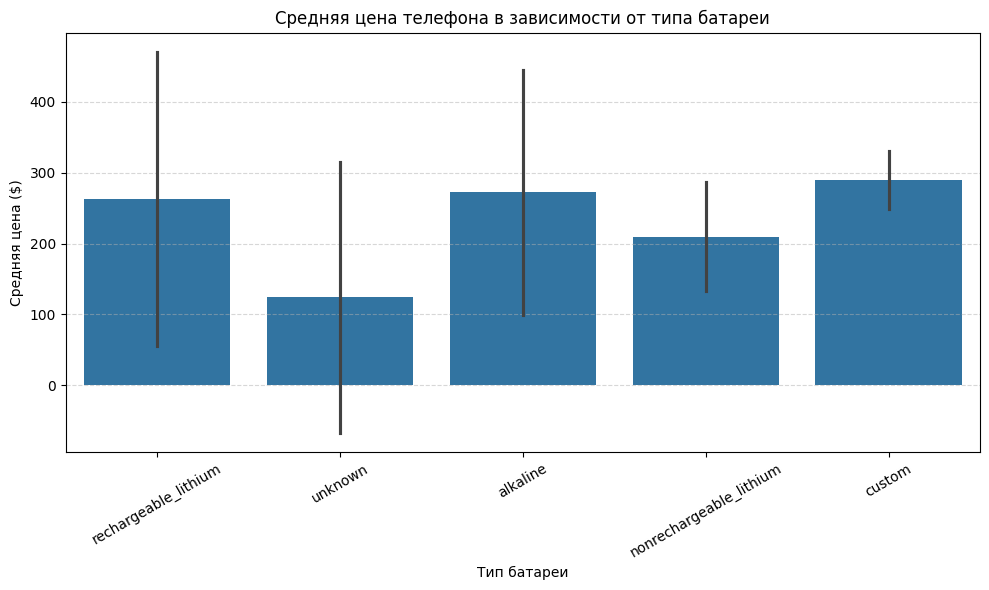

In [171]:
# Оставим только нужные колонки
data_subset = data[['price_num', 'battery_group']]

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(data=data_subset, x='battery_group', y='price_num', estimator='mean', errorbar='sd')

plt.title('Средняя цена телефона в зависимости от типа батареи')
plt.ylabel('Средняя цена ($)')
plt.xlabel('Тип батареи')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


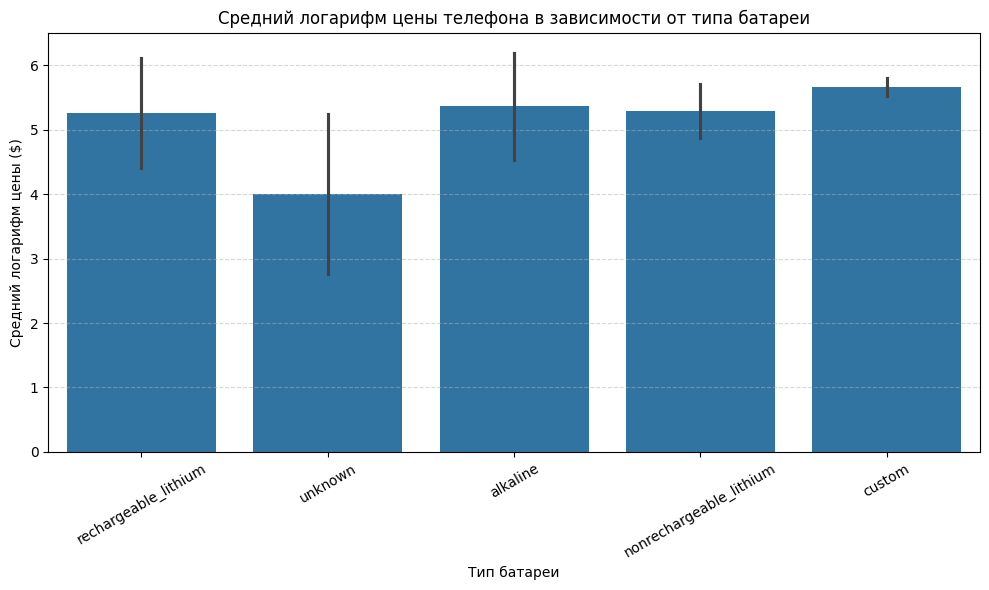

In [174]:
# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='battery_group', y='log_price_num', estimator='mean', errorbar='sd')

plt.title('Средний логарифм цены телефона в зависимости от типа батареи')
plt.ylabel('Средний логарифм цены ($)')
plt.xlabel('Тип батареи')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [175]:
nonrechargeable_types = [
    'Lithium Metal', 'CR5', 'CR2', 'AA', 'AAA', 'C', 'D', '9V', 'A', 'P76', 'LR44', 'LR41'
]

nonrechargeable_data = data[data['battery_type'].isin(nonrechargeable_types)]

In [176]:
nonrechargeable_data['phone_brand']

11     Motorola
13      SAMSUNG
20      SAMSUNG
22      SAMSUNG
31     Motorola
         ...   
673      Xiaomi
732     SAMSUNG
738      Xiaomi
762      Xiaomi
770      Xiaomi
Name: phone_brand, Length: 65, dtype: object

In [177]:
nonrechargeable_data['phone_model_numer']

11                   XT2429-1
13                   SM-A156U
20             SM-A156WZKAXAC
22             F-S721BLBJL300
31                   XT2315-1
                ...          
673                Poco X6 5G
732            SM-G950UZKAATT
738    Redmi Note 13 Pro Plus
762                      M12A
770                Poco X6 5G
Name: phone_model_numer, Length: 65, dtype: object

Тип батареи на амазоне может указываться неверно

Посмотрим на мощность батареи

In [178]:
print(data['phone_batt_power_rating'].unique())

['5000 Watt Hours' None '5000 Milliamp Hours'
 '5000 Milliampere Hour (mAh)' '3' '4630' '5000.0' '5000' '1450'
 '19.03 Watt Hours' '4500' '4900 Milliamp Hours' '4500 Milliamp Hours'
 '4800 Milliamp Hours' '4200' '4700 Milliamp Hours' '4000'
 '4000 Milliamp Hours' '4' '19' '4500 Milliampere Hour (mAh)' '1500'
 '3000' '5500 Milliamp Hours' '5030 Milliamp Hours' '4850' '1350' '3687'
 '3700 Milliamp Hours' '4050 Milliampere Hour (mAh)' '5160 Milliamp Hours'
 '4600 Milliampere Hour (mAh)' '6000 Milliamp Hours' '4800' '4050' '4100'
 '5200 Milliamp Hours' '478 Milliamp Hours' '5110 Milliamp Hours'
 '18.85 Watt Hours' '1' '9' '3700 Milliampere Hour (mAh)' '4400' '3300'
 '1850' '5050' '3500' '3400' '2942' '3100 Milliampere Hour (mAh)' '5500'
 '4100 Milliamp Hours' '3400 Milliamp Hours' '1000 Milliamp Hours'
 '4000.00' '4400 Milliampere Hour (mAh)' '2920']


C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\322582293.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='battery_range', y='price_num', estimator='mean', errorbar='sd', palette='Blues')


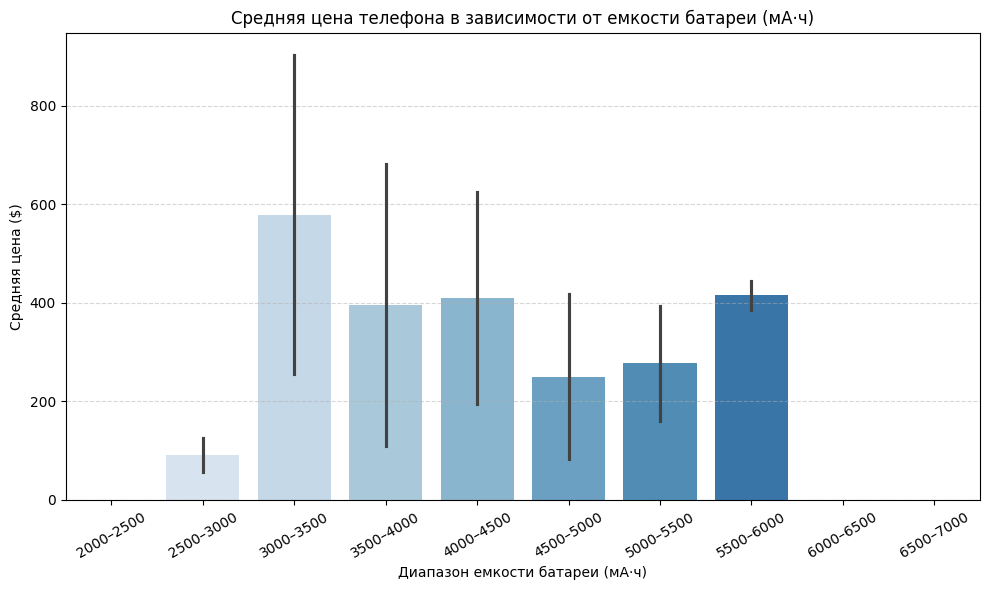

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Функция очистки и извлечения емкости в мА·ч
def extract_capacity(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower().strip()

    match_mAh = re.search(r'(\d+(?:\.\d+)?)\s*(milliamp(?:ere)? hour|mah)', value)
    if match_mAh:
        return float(match_mAh.group(1))

    match_wh = re.search(r'(\d+(?:\.\d+)?)\s*watt hour', value)
    if match_wh:
        wh = float(match_wh.group(1))
        voltage = 3.85
        return round(wh * 1000 / voltage, 1)

    match_number = re.match(r'^\d+(\.\d+)?$', value)
    if match_number:
        raw = float(value)
        if 800 <= raw <= 7000:
            return raw
    return np.nan

# Применяем функцию к колонке
data['battery_capacity_mAh'] = data['phone_batt_power_rating'].apply(extract_capacity)

# Создаем диапазоны по емкости
bins = list(range(2000, 7500, 500))
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins) - 1)]
data['battery_range'] = pd.cut(data['battery_capacity_mAh'], bins=bins, labels=labels)

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='battery_range', y='price_num', estimator='mean', errorbar='sd', palette='Blues')

plt.title('Средняя цена телефона в зависимости от емкости батареи (мА·ч)')
plt.ylabel('Средняя цена ($)')
plt.xlabel('Диапазон емкости батареи (мА·ч)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\2156473458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='battery_range', palette='Blues')


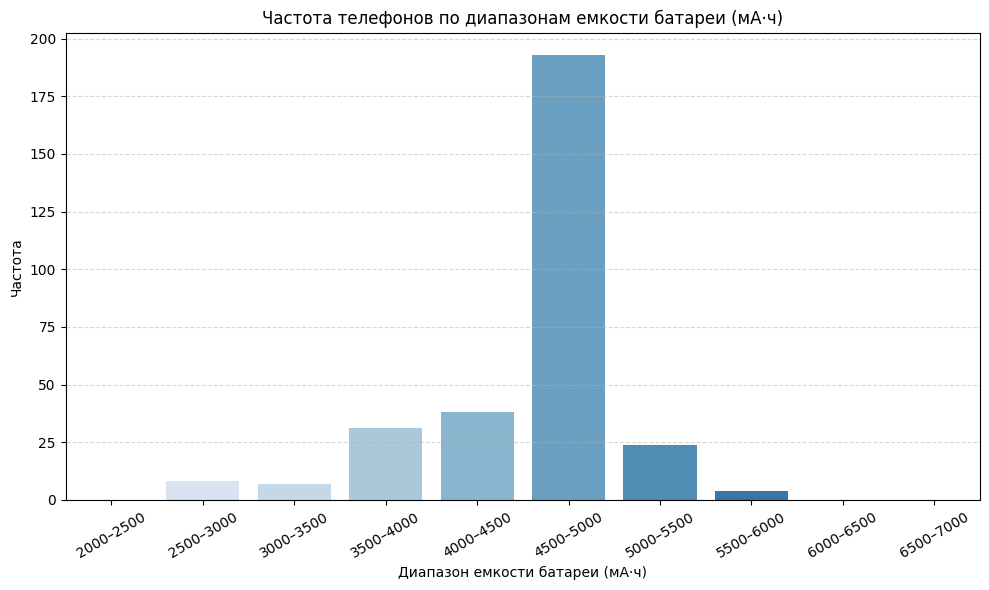

In [199]:
# Барплот по частоте для каждого диапазона емкости батареи
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='battery_range', palette='Blues')

plt.title('Частота телефонов по диапазонам емкости батареи (мА·ч)')
plt.ylabel('Частота')
plt.xlabel('Диапазон емкости батареи (мА·ч)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Логарифм

C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\3729798898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='battery_range', y='log_price_num', estimator='mean', errorbar='sd', palette='Blues')


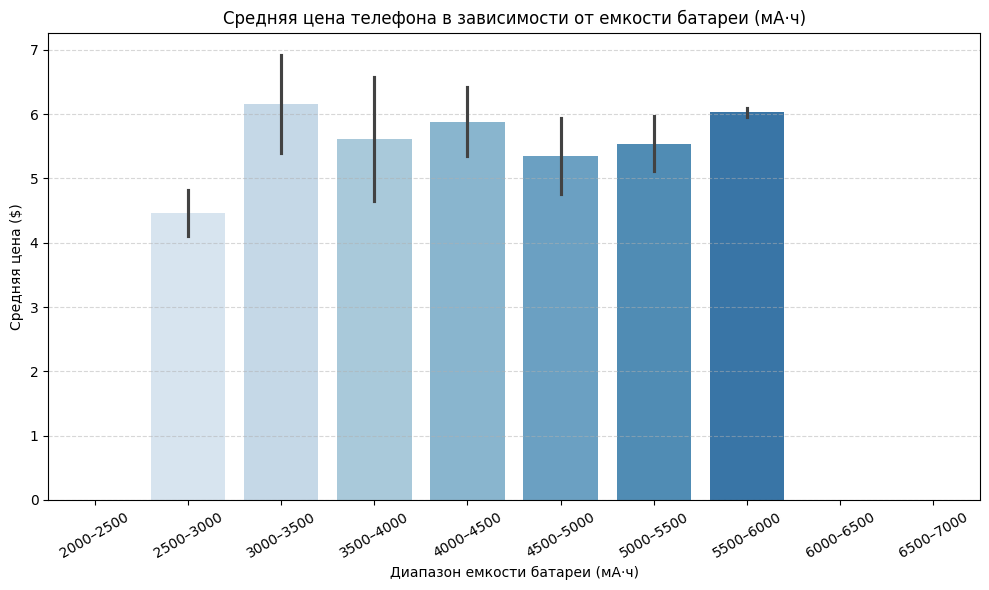

In [191]:
# График логарифма
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='battery_range', y='log_price_num', estimator='mean', errorbar='sd', palette='Blues')

plt.title('Средняя цена телефона в зависимости от емкости батареи (мА·ч)')
plt.ylabel('Средняя цена ($)')
plt.xlabel('Диапазон емкости батареи (мА·ч)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Тут стоит добавить еще одну выгрузку емкости батареи - battery capacity

#### wire_comm_tech

In [192]:
data.shape

(785, 18)

In [195]:
data.columns

Index(['phone_date', 'phone_model_numer', 'phone_batteries',
       'phone_batt_power_rating', 'phone_wire_com_tech', 'phone_conn_tech',
       'phone_is_GPS', 'phone_display_tech', 'phone_other_display_features',
       'phone_other_cam_features', 'phone_from_factor', 'phone_sale_price',
       'phone_brand', 'phone_manufacturer', 'price_num', 'log_price_num',
       'battery_capacity_mAh', 'battery_range'],
      dtype='object')

In [214]:
for col in ['phone_wire_com_tech', 'phone_conn_tech']:
    unique_count = data[col].nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

Колонка 'phone_wire_com_tech': уникальных значений = 16, NaN = 408
Колонка 'phone_conn_tech': уникальных значений = 47, NaN = 290


In [236]:
data['connection_technology'] = data['phone_wire_com_tech'].fillna('') + ' ' + data['phone_conn_tech'].fillna('')
data['connection_technology'] = data['connection_technology']

In [237]:
data.connection_technology[data.connection_technology == '']

Series([], Name: connection_technology, dtype: object)

In [238]:
for col in ['connection_technology']:
    # Convert lists to tuples for hashing
    unique_count = data[col].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

Колонка 'connection_technology': уникальных значений = 97, NaN = 0


In [239]:
data.connection_technology.unique()

array(['Bluetooth, Cellular, Wi-Fi, NFC NFC', ' USB, Bluetooth V 5.1',
       ' 2G, 3G, 4G, 5G', 'Cellular, Wi-Fi Wi-Fi',
       'Cellular Bluetooth, Wi-Fi, GSM/UMTS/LTE', 'Cellular USB',
       'Bluetooth, Cellular, Wi-Fi, NFC Bluetooth, Wi-Fi, USB, NFC',
       'Cellular Bluetooth, Wi-Fi, USB, NFC',
       'Cellular, Bluetooth, Wi-Fi, NFC NFC', 'Cellular ',
       ' Bluetooth, Wi-Fi, USB', 'Cellular Wireless', ' 2G, 5G',
       'Bluetooth® 5.0 LTE, GSM, CDMA, UMTS, Wi-Fi', 'Cellular Wi-Fi',
       ' ', 'Cellular Bluetooth, USB', ' Bluetooth, Wi-Fi, USB, NFC',
       'Bluetooth, Cellular Bluetooth', 'Bluetooth, Cellular, Wi-Fi ',
       ' 2G, 3G, 4G LTE, 5G', 'Bluetooth, Cellular, Wi-Fi, NFC USB',
       'Cellular, Wi-Fi Bluetooth, Wi-Fi',
       'Cellular Bluetooth, Wi-Fi, USB',
       'Bluetooth, Wi-Fi Bluetooth, Wi-Fi, USB', 'Cellular 5G',
       'Bluetooth, Cellular, Wi-Fi Bluetooth, Wi-Fi, USB',
       ' 5G, Bluetooth, Wi-Fi, USB, NFC',
       'Wi-Fi Bluetooth, Wi-Fi, USB Type C,

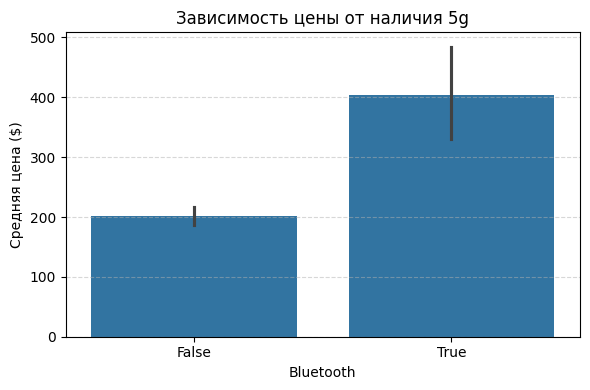

In [248]:
import re
from collections import Counter
import pandas as pd

# Функция для извлечения технологий
def extract_wireless_techs(value):
    if pd.isna(value):
        return []
    value = value.lower().replace('®', '')
    return re.split(r'[\s]*[,|::][\s]*', value.strip())

# Применяем функцию к столбцу connection_technology
data['wireless_tech_list'] = data['connection_technology'].apply(extract_wireless_techs)

# Считаем все уникальные технологии
all_techs = Counter(tech for lst in data['wireless_tech_list'] for tech in lst if tech)

# Выбираем топовые технологии для one-hot encoding (например, те, что встречаются > 30 раз)
common_techs = [tech for tech, count in all_techs.items() if count > 30]

# Создаём бинарные признаки для каждой технологии
for tech in common_techs:
    data[f'has_{tech.replace(" ", "_")}'] = data['wireless_tech_list'].apply(lambda x: tech in x)

# Пример визуализации зависимости цены от наличия одной из технологий
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='has_5g', y='price_num')
plt.title('Зависимость цены от наличия 5g')
plt.xlabel('Bluetooth')
plt.ylabel('Средняя цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

В большинстве моделей телефонов bluetooth есть, некоторые просто явно не будут указывать это. А вот с 5g это работает лучше.

phone_wire_com_tech - сокращение со слов беспроводные технологии, поддерживаемые устройством

In [246]:
data.columns

Index(['phone_date', 'phone_model_numer', 'phone_batteries',
       'phone_batt_power_rating', 'phone_wire_com_tech', 'phone_conn_tech',
       'phone_is_GPS', 'phone_display_tech', 'phone_other_display_features',
       'phone_other_cam_features', 'phone_from_factor', 'phone_sale_price',
       'phone_brand', 'phone_manufacturer', 'price_num', 'log_price_num',
       'battery_capacity_mAh', 'battery_range', 'wireless_tech_list',
       'has_bluetooth', 'has_cellular', 'has_wi-fi', 'has_5g',
       'connection_technology', 'has_usb', 'has_cellular_bluetooth',
       'has_cellular_usb', 'has_nfc', 'has_cellular_wi-fi',
       'has_wi-fi_bluetooth'],
      dtype='object')

#### GPS

In [251]:
print(data['phone_is_GPS'].unique())
for col in ['phone_is_GPS']:
    # Convert lists to tuples for hashing
    unique_count = data[col].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

['True' 'False' None 'GLONASS' 'GPS' 'GPS,Glonass,Galileo'
 'Possible, but not confirmed' 'AGPS' '[LIKELY] True' 'GPS,Glonass'
 'Geotagging']
Колонка 'phone_is_GPS': уникальных значений = 10, NaN = 309


In [252]:
data['phone_is_GPS_processed'] = data['phone_is_GPS'].str.lower().fillna('unknown')
data['phone_is_GPS_processed'] = data['phone_is_GPS_processed'].replace({
    'agps': 'gps',
    '[likely] true': 'likely_true',
    'glonass': 'glonass',  # явно указываем для сохранения системы
    'possible, but not confirmed': 'unconfirmed'
})

# Функция для создания бинарных колонок
def parse_navigation(value):
    systems = {
        'has_gps': False,
        'has_glonass': False,
        'has_galileo': False,
        'supports_geotagging': False,
        'is_confirmed': True
    }
    
    if 'unknown' in value:
        return {k: None for k in systems}
    
    # Обработка геотегов и подтверждения
    systems['supports_geotagging'] = 'geotagging' in value
    systems['is_confirmed'] = not ('unconfirmed' in value or 'likely_true' in value)
    
    # Обработка систем
    systems['has_gps'] = any(x in value for x in ['gps', 'true', 'likely_true'])
    systems['has_glonass'] = 'glonass' in value
    systems['has_galileo'] = 'galileo' in value
    
    # Обработка False
    if 'false' in value:
        systems.update({k: False for k in ['has_gps', 'has_glonass', 'has_galileo']})
    
    return systems

# Применяем функцию и создаем новые колонки
new_columns = data['phone_is_GPS_processed'].apply(lambda x: pd.Series(parse_navigation(x)))
data = pd.concat([data, new_columns], axis=1)

# Удаляем временную колонку
data.drop('phone_is_GPS_processed', axis=1, inplace=True)

C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\290350719.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[navigation_columns] = data[navigation_columns].fillna(False)


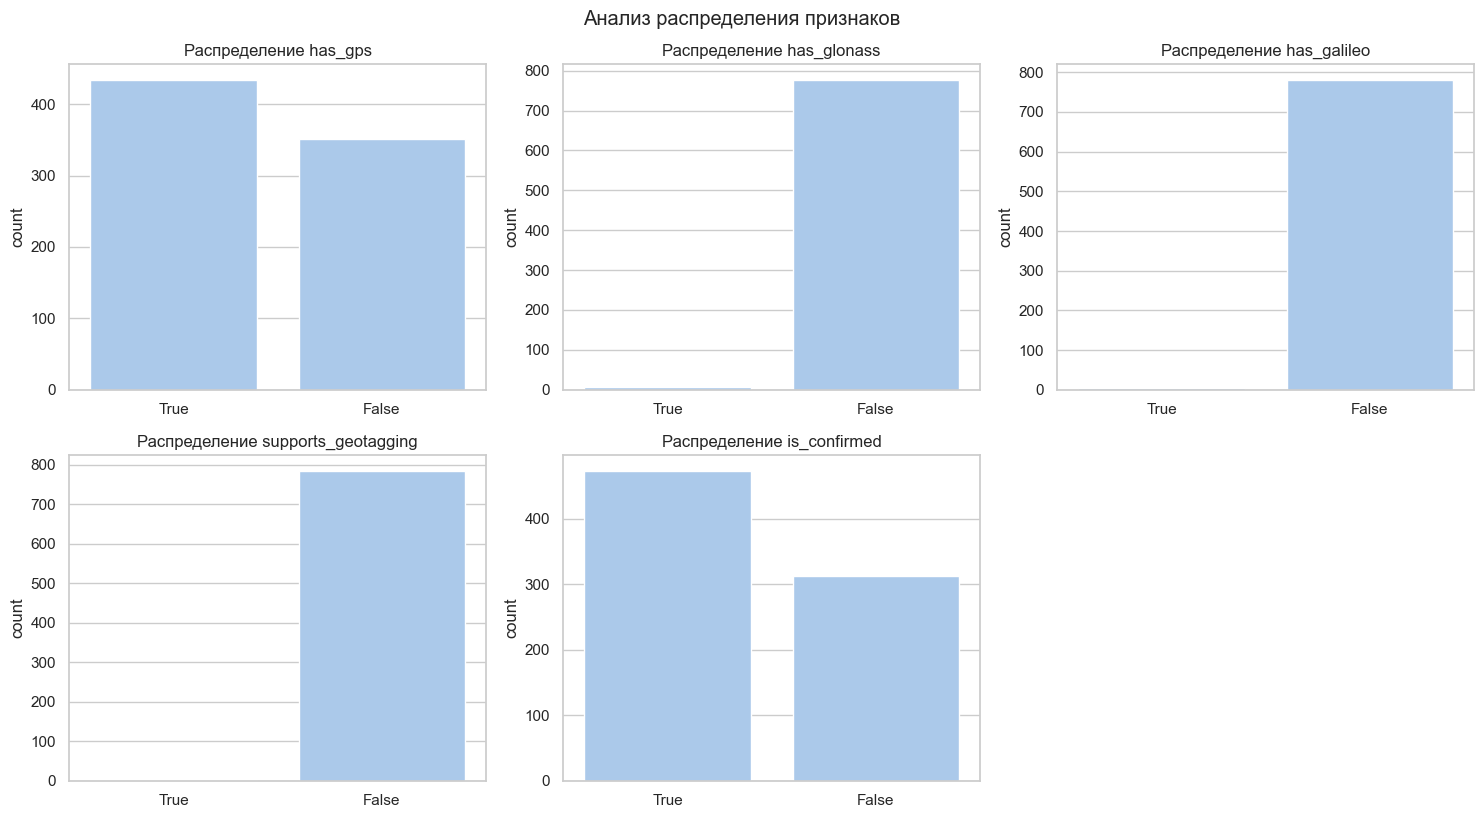

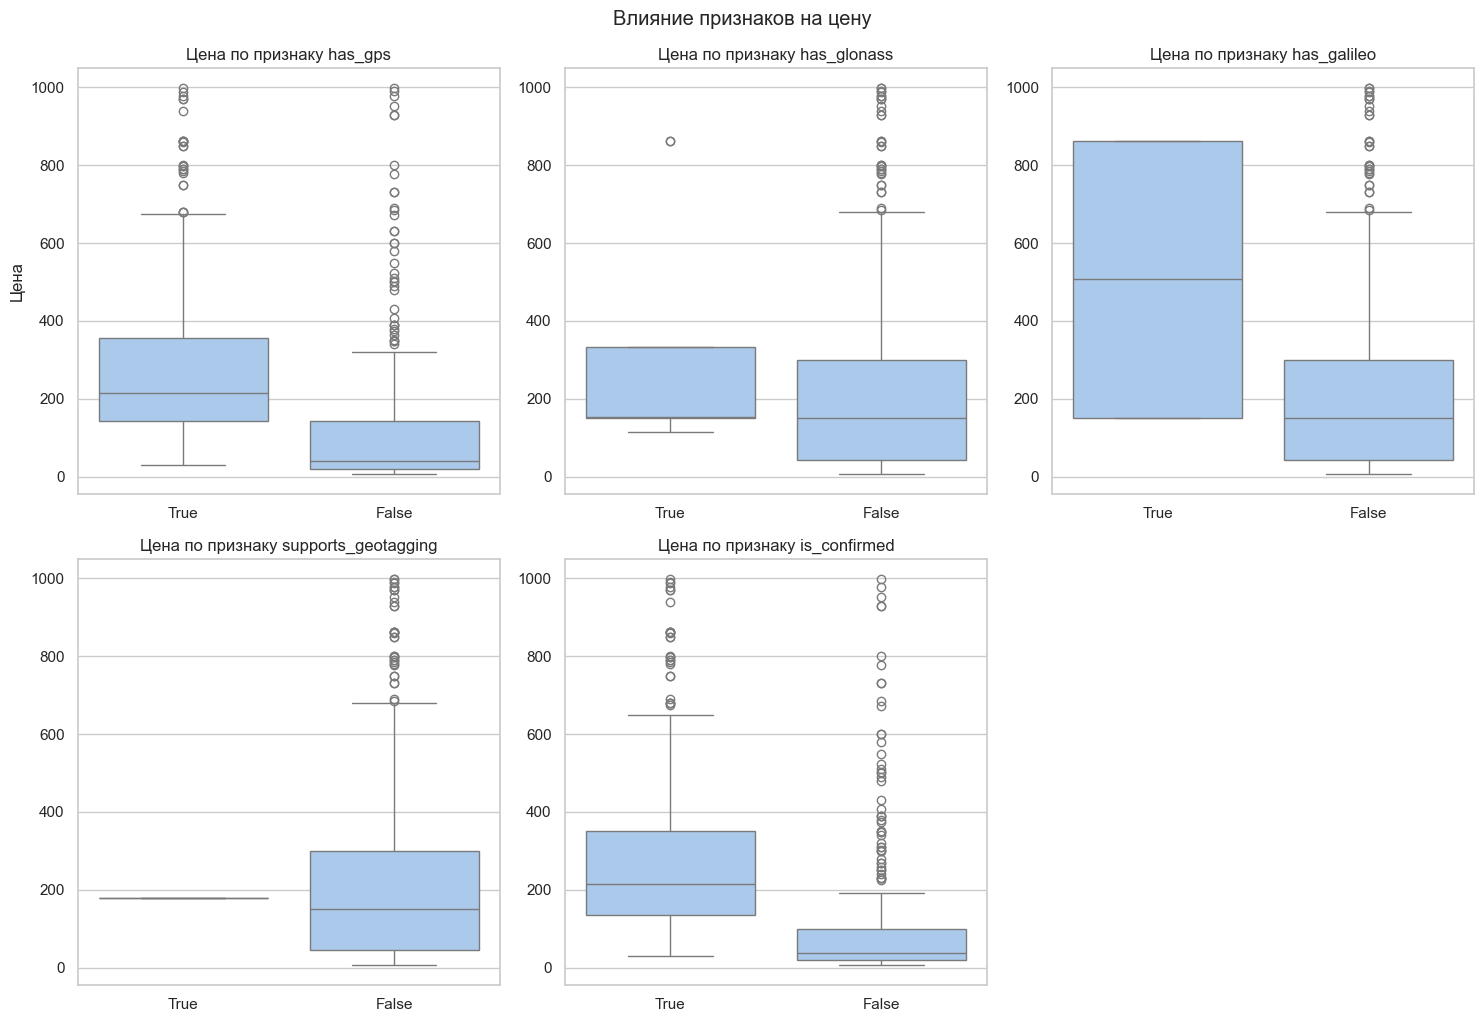

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Заменим None на False в навигационных колонках
navigation_columns = ['has_gps', 'has_glonass', 'has_galileo', 'supports_geotagging', 'is_confirmed']
data[navigation_columns] = data[navigation_columns].fillna(False)

# Настройка стиля графиков
sns.set(style="whitegrid", palette="pastel")

# 1. Графики распределения признаков
plt.figure(figsize=(15, 8))
for i, col in enumerate(navigation_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=data, order=[True, False])
    plt.title(f'Распределение {col}')
    plt.xlabel('')
    
plt.tight_layout()
plt.suptitle('Анализ распределения признаков', y=1.02)
plt.show()

# 2. Влияние на цену
plt.figure(figsize=(15, 10))
for i, col in enumerate(navigation_columns, 1):
    plt.subplot(2, 3, i)
    
    # Фильтрация данных
    plot_data = data.dropna(subset=['price_num'])
    
    # Используем только True/False
    plot_data = plot_data[plot_data[col].isin([True, False])]
    
    sns.boxplot(x=col, y='price_num', data=plot_data, order=[True, False])
    
    plt.title(f'Цена по признаку {col}')
    plt.xlabel('')
    plt.ylabel('Цена' if i == 1 else '')
    
plt.tight_layout()
plt.suptitle('Влияние признаков на цену', y=1.02)
plt.show()

Посмотрим на то, как наличие gps вообще влияет на цену

C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\2711478222.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


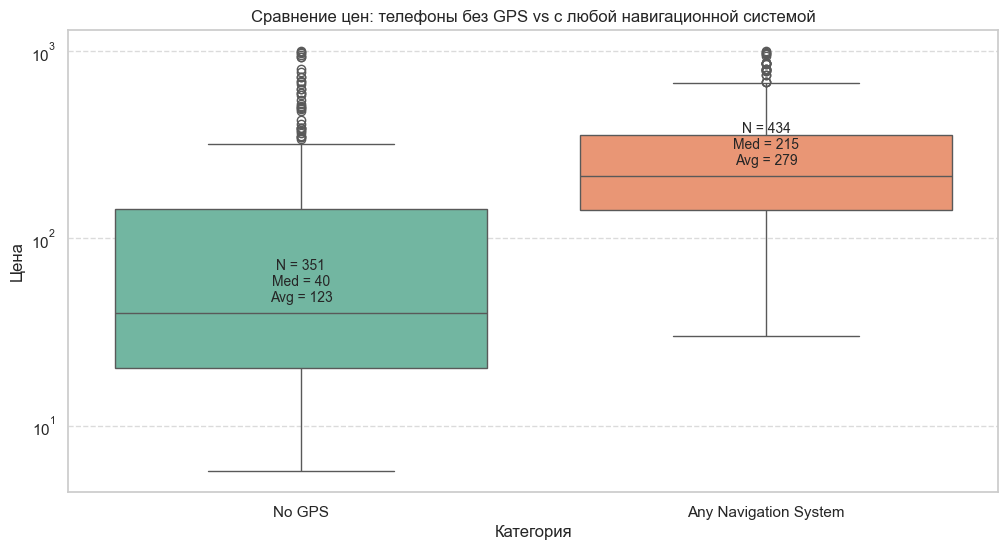

In [261]:
# Создаем колонку для группировки
data['navigation_group'] = np.where(
    data['has_gps'] == False, 
    'No GPS', 
    'Any Navigation System'
)

# Альтернативный вариант: учитываем все навигационные системы (не только GPS)
# data['navigation_group'] = np.where(
#     (data['has_gps'] | data['has_glonass'] | data['has_galileo']),
#     'Any Navigation System',
#     'No Navigation Systems'
# )

# Фильтруем данные
plot_data = data.dropna(subset=['price_num'])

# Настраиваем график
plt.figure(figsize=(12, 6))

# Боксплот для сравнения цен
sns.boxplot(
    x='navigation_group', 
    y='price_num', 
    data=plot_data,
    order=['No GPS', 'Any Navigation System'],
    palette='Set2'
)

plt.title('Сравнение цен: телефоны без GPS vs с любой навигационной системой')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Добавляем аннотации со статистикой
stats = plot_data.groupby('navigation_group')['price_num'].agg(['median', 'mean', 'size'])
for i, group in enumerate(['No GPS', 'Any Navigation System']):
    plt.text(
        i, 
        stats.loc[group, 'median']*1.1, 
        f"N = {stats.loc[group, 'size']}\nMed = {stats.loc[group, 'median']:.0f}\nAvg = {stats.loc[group, 'mean']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

Ну тут и дураку понятно что различия статистически значимы

In [262]:
from scipy.stats import ttest_ind

group1 = plot_data[plot_data['navigation_group'] == 'No GPS']['price_num']
group2 = plot_data[plot_data['navigation_group'] == 'Any Navigation System']['price_num']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"p-value: {p_value:.4f}")

p-value: 0.0000


C:\Users\Валерия\AppData\Local\Temp\ipykernel_34020\760989204.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


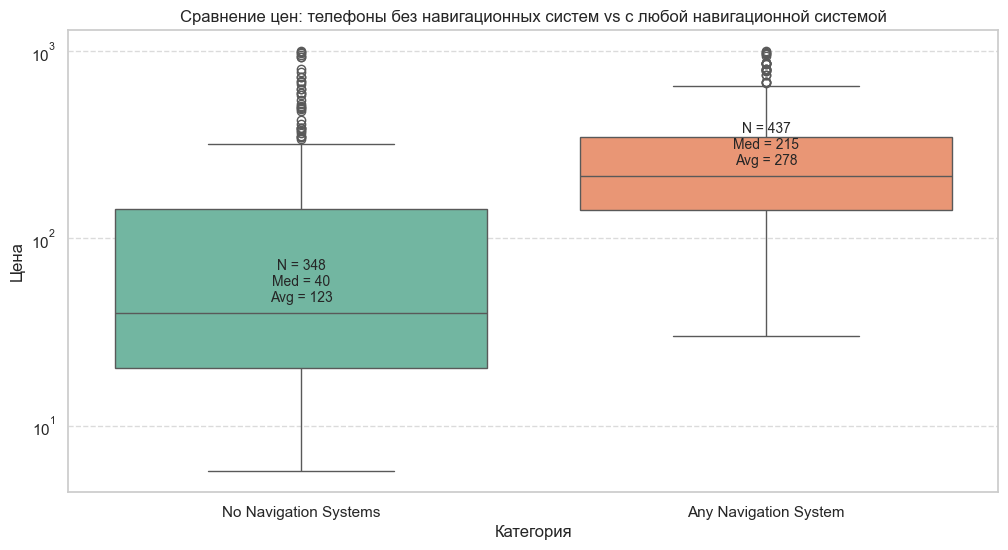

In [ ]:
# Альтернативный вариант: учитываем все навигационные системы (не только GPS)
data['navigation_group'] = np.where(
    (data['has_gps'] | data['has_glonass'] | data['has_galileo']),
    'Any Navigation System',
    'No Navigation Systems'  # Новое название категории
)

plt.figure(figsize=(12, 6))

# Боксплот для сравнения цен
sns.boxplot(
    x='navigation_group', 
    y='price_num', 
    data=plot_data,
    order=['No Navigation Systems', 'Any Navigation System'],  # Обновленный порядок
    palette='Set2'
)

plt.title('Сравнение цен: телефоны без навигационных систем vs с любой навигационной системой')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Добавляем аннотации со статистикой
stats = plot_data.groupby('navigation_group')['price_num'].agg(['median', 'mean', 'size'])
for i, group in enumerate(['No Navigation Systems', 'Any Navigation System']):
    plt.text(
        i, 
        stats.loc[group, 'median']*1.1, 
        f"N = {stats.loc[group, 'size']}\nMed = {stats.loc[group, 'median']:.0f}\nAvg = {stats.loc[group, 'mean']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

#### display_tech, other_display_features

In [263]:
data.shape

(785, 36)

In [264]:
data.columns

Index(['phone_date', 'phone_model_numer', 'phone_batteries',
       'phone_batt_power_rating', 'phone_wire_com_tech', 'phone_conn_tech',
       'phone_is_GPS', 'phone_display_tech', 'phone_other_display_features',
       'phone_other_cam_features', 'phone_from_factor', 'phone_sale_price',
       'phone_brand', 'phone_manufacturer', 'price_num', 'log_price_num',
       'battery_capacity_mAh', 'battery_range', 'wireless_tech_list',
       'has_bluetooth', 'has_cellular', 'has_wi-fi', 'has_5g',
       'connection_technology', 'has_usb', 'has_cellular_bluetooth',
       'has_cellular_usb', 'has_nfc', 'has_cellular_wi-fi',
       'has_wi-fi_bluetooth', 'has_gps', 'has_glonass', 'has_galileo',
       'supports_geotagging', 'is_confirmed', 'navigation_group'],
      dtype='object')

In [265]:
for col in ['phone_display_tech', 'phone_other_display_features']:
    unique_count = data[col].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

Колонка 'phone_display_tech': уникальных значений = 11, NaN = 664
Колонка 'phone_other_display_features': уникальных значений = 4, NaN = 146


In [268]:
# Выведем несколько моделей телефонов, у которых phone_display_tech == None
sample_none_display = data[data['phone_display_tech'].isna()][['phone_model_numer', 'phone_brand', 'phone_display_tech']].head(10)
print(sample_none_display)

  phone_model_numer phone_brand phone_display_tech
0       SAMSUNG A55     SAMSUNG               None
1            S256VL    Tracfone               None
2          A166M/DS     SAMSUNG               None
3       SM-A145M/DS     SAMSUNG               None
4           XT2415V    Tracfone               None
5               A25     SAMSUNG               None
6        PAYTOO31SE    Motorola               None
7           TA-1371       Nokia               None
8       SAMSUNG A55     SAMSUNG               None
9       SM-A065M/DS     SAMSUNG               None


Действительно, у многих телефонов это просто не указано.

Dual sim == ?

In [269]:
print(data.phone_other_display_features.unique())

['Wireless' None 'PC Accessory' 'Wireless Device' 'CE']


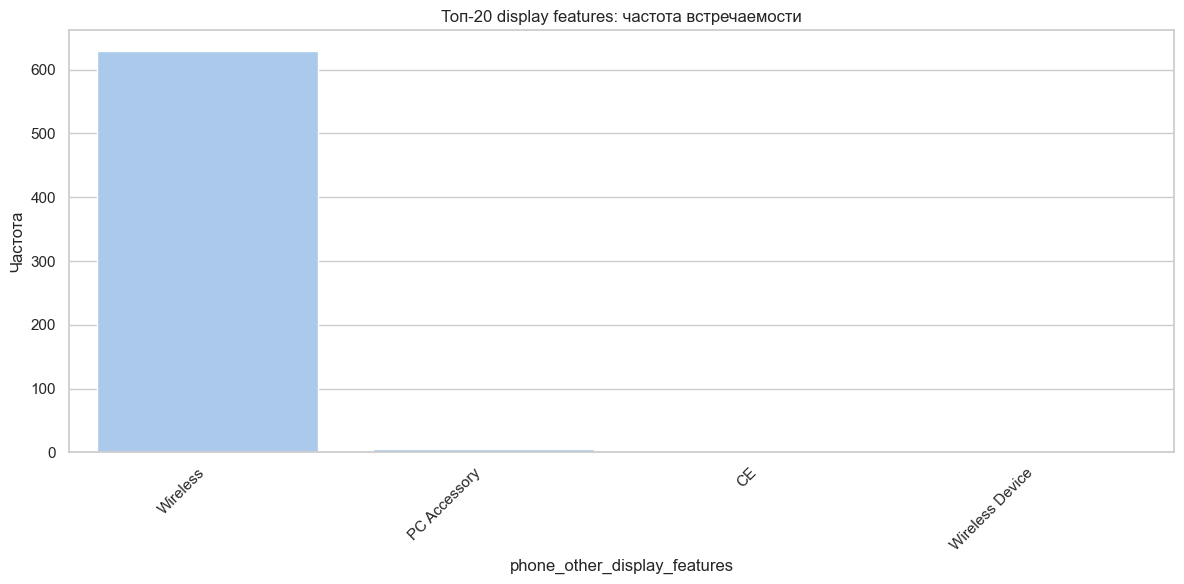

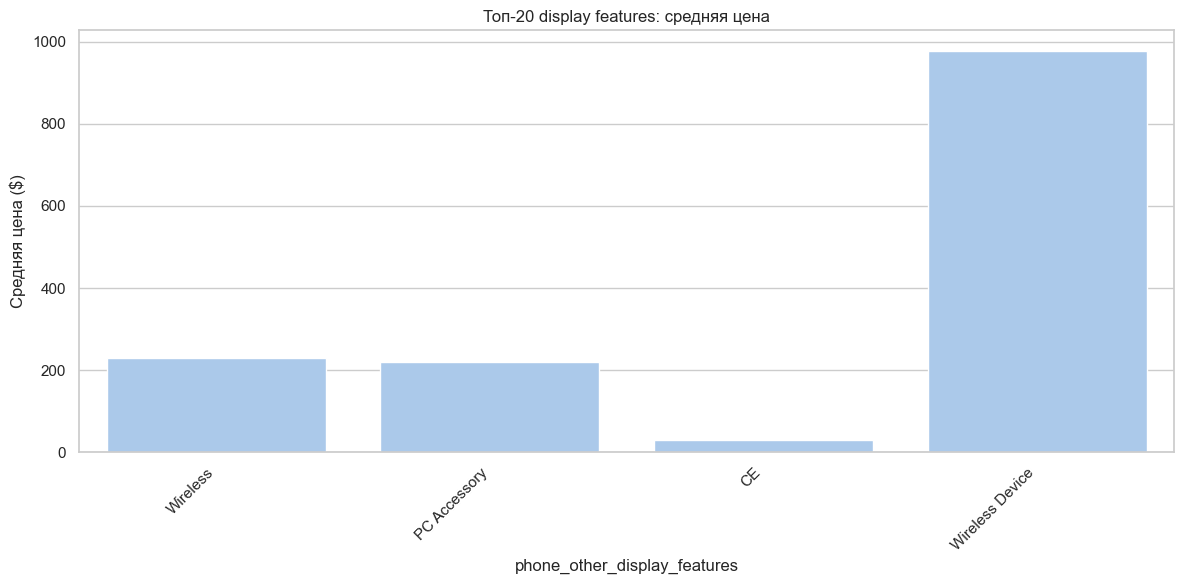

In [ ]:
# Барплот по частоте каждого значения
plt.figure(figsize=(12, 6))
feature_counts = data['phone_other_display_features'].value_counts().head(20)
sns.barplot(x=feature_counts.index, y=feature_counts.values)
plt.title('Топ-20 display features: частота встречаемости')
plt.ylabel('Частота')
plt.xlabel('phone_other_display_features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
top_features = feature_counts.index
mean_prices = data[data['phone_other_display_features'].isin(top_features)].groupby('phone_other_display_features')['price_num'].mean()
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Топ-20 display features: средняя цена')
plt.ylabel('Средняя цена ($)')
plt.xlabel('phone_other_display_features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [271]:
data.groupby('phone_other_display_features').count()

,phone_date,phone_model_numer,phone_batteries,phone_batt_power_rating,phone_wire_com_tech,phone_conn_tech,phone_is_GPS,phone_display_tech,phone_other_cam_features,phone_from_factor,...,has_cellular_usb,has_nfc,has_cellular_wi-fi,has_wi-fi_bluetooth,has_gps,has_glonass,has_galileo,supports_geotagging,is_confirmed,navigation_group
phone_other_display_features,,,,,,,,,,,,,,,,,,,,,
CE,2,2,0,0,0,1,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
PC Accessory,6,6,6,6,6,6,4,0,6,6,...,6,6,6,6,6,6,6,6,6,6
Wireless,630,617,440,341,371,487,469,121,441,601,...,630,630,630,630,630,630,630,630,630,630
Wireless Device,1,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


#### other_cam_features

In [272]:
data.columns

Index(['phone_date', 'phone_model_numer', 'phone_batteries',
       'phone_batt_power_rating', 'phone_wire_com_tech', 'phone_conn_tech',
       'phone_is_GPS', 'phone_display_tech', 'phone_other_display_features',
       'phone_other_cam_features', 'phone_from_factor', 'phone_sale_price',
       'phone_brand', 'phone_manufacturer', 'price_num', 'log_price_num',
       'battery_capacity_mAh', 'battery_range', 'wireless_tech_list',
       'has_bluetooth', 'has_cellular', 'has_wi-fi', 'has_5g',
       'connection_technology', 'has_usb', 'has_cellular_bluetooth',
       'has_cellular_usb', 'has_nfc', 'has_cellular_wi-fi',
       'has_wi-fi_bluetooth', 'has_gps', 'has_glonass', 'has_galileo',
       'supports_geotagging', 'is_confirmed', 'navigation_group'],
      dtype='object')

In [273]:
for col in ['phone_other_cam_features']:
    unique_count = data[col].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique(dropna=True)
    nan_count = data[col].isna().sum()
    print(f"Колонка '{col}': уникальных значений = {unique_count}, NaN = {nan_count}")

Колонка 'phone_other_cam_features': уникальных значений = 24, NaN = 337


In [274]:
data.phone_other_cam_features.unique()

array(['Front', 'Rear, Front', None, '50MP + 8MP', 'Rear',
       'Rear camera: 50MP, triple lens', '50MP + 2MP',
       'Camera 2: 13MP (f/2.2, 1.12μm), Ultra wide/ macro, FOV 120°, Main Rear: 64MP (f/1.7, 0.7μm or 16MP 1.4μm Quad Pixel), OIS, Laser Autofocus + Ambient Light Sensor',
       'Main Rear: 50MP (f/1.7, 0.8μm) or 12.6MP (1.6μm Quad Pixel) | OIS | Instant-all Pixel Focus, Camera 2: 50MP telephoto lens (f/2.0, 0.64um) or 12.6MP (1.28μm Quad Pixel) | 2x optical zoom',
       '5Mp', '13 MP', '50MP AF+5MP FF+2MP FF', 'Front, Rear, Video',
       '50MP + 5MP(UW) + 2MP(Depth)', '50MP + 13MP (Rear) 32M (Front)',
       '50mp Main Camera', '12.0',
       'Super Speed Dual Pixel Rear Dual: 12MP OIS (F1.5/F2.4) 12MP OIS (F2.4) Front: 8MP AF (F1.7)',
       '5.0', '12', 'Rear multi-lens camera system', '5 MP', '12 MP',
       '16 MP',
       '50MP main camera with Night mode, 12MP ultra-wide lens, and Optical Image Stabilization (OIS).'],
      dtype=object)

In [275]:
data.phone_from_factor.unique()

array(['Smartphone', 'Bar', 'Slate', 'smartphone', 'Smart Phone',
       'Foldable', None, 'Foldable Screen', 'Smartphone Unlocked', 'Flip',
       'Wallet', 'Basic Case', 'Wall Adapter with Captive Cable',
       'Rugged Case', 'Slider', 'Lipstick', 'In Ear', 'Case', 'Bumper',
       'Palm held', 'Block', 'Slate or Bar'], dtype=object)

Немножечко теории для нашего научного сообщества

* Slate phone — это смартфон, в котором практически нет физических кнопок, вместо этого он использует сенсорный экран и экранную виртуальную клавиатуру для ввода
* Bar phone — это мобильный телефон прямоугольной формы, напоминающий стержень из мыла или конфеты.  
Обычно имеет экран и физические или сенсорные кнопки. В отличие от флип-телефонов, у таких устройств нет петель и движущихся частей.
* Foldable phone — это смартфон с гибким экраном, который можно складывать. Такой дизайн позволяет иметь большой экран, не увеличивая общий размер устройства
* Unlocked smartphone — это смартфон, на котором нет ограничений, установленных оператором, сетью или другими поставщиками услуг
* «Flip» phone — это смартфон, у которого экран складывается сверху вниз вдоль горизонтальной стороны. 
* Слайдер это надо загуглить, чтобы прочувствовать


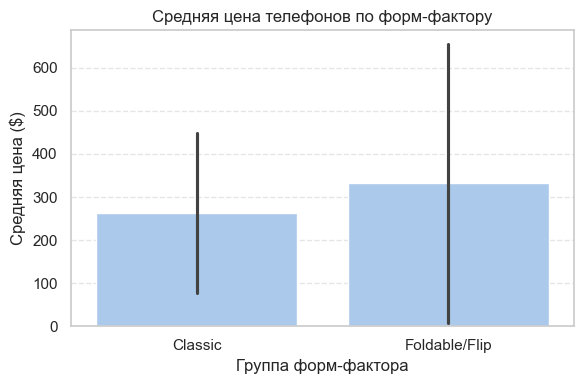

In [276]:
# Группы форм-фактора
foldable_group = ['Foldable', 'Flip', 'Foldable Screen']
classic_group = ['Smartphone', 'Bar', 'Slate', 'smartphone', 'Smart Phone', 'Slider', 'Slate or Bar']

# Создаем новую колонку с группой
data['form_factor_group'] = np.where(
    data['phone_from_factor'].isin(foldable_group), 'Foldable/Flip',
    np.where(data['phone_from_factor'].isin(classic_group), 'Classic', 'Other')
)

# Фильтруем только нужные группы
plot_df = data[data['form_factor_group'].isin(['Foldable/Flip', 'Classic'])]

# Строим барплот
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_df, x='form_factor_group', y='price_num', estimator='mean', errorbar='sd')
plt.title('Средняя цена телефонов по форм-фактору')
plt.xlabel('Группа форм-фактора')
plt.ylabel('Средняя цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [277]:
# Группируем classic телефоны на 'Slider' и остальные
classic_sliders = plot_df[(plot_df['form_factor_group'] == 'Classic') & (plot_df['phone_from_factor'] == 'Slider')]
classic_others = plot_df[(plot_df['form_factor_group'] == 'Classic') & (plot_df['phone_from_factor'] != 'Slider')]

mean_slider = classic_sliders['price_num'].mean()
mean_other_classic = classic_others['price_num'].mean()

print(f"Средняя цена слайдеров: {mean_slider:.2f} $")
print(f"Средняя цена остальных классических телефонов: {mean_other_classic:.2f} $")

Средняя цена слайдеров: 252.32 $
Средняя цена остальных классических телефонов: 262.74 $


In [278]:
# Вывести уникальные значения phone_from_factor по частоте встречаемости
factor_counts = data['phone_from_factor'].value_counts(dropna=False)
print(factor_counts)

phone_from_factor
Smartphone                         207
None                               175
Slate                              129
Bar                                119
Basic Case                          63
Flip                                22
Foldable Screen                     15
Case                                11
Slider                               9
Wallet                               8
Bumper                               6
Smart Phone                          5
Lipstick                             3
smartphone                           3
Block                                2
Slate or Bar                         2
Foldable                             1
Smartphone Unlocked                  1
Rugged Case                          1
Wall Adapter with Captive Cable      1
In Ear                               1
Palm held                            1
Name: count, dtype: int64


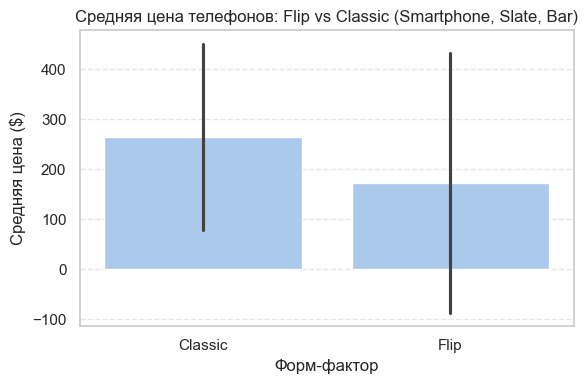

In [280]:
# Группируем форм-факторы
flip_group = ['Flip']
classic_group = ['Smartphone', 'Slate', 'Bar']

# Создаем новую колонку с группой
data['form_factor_simple'] = np.where(
    data['phone_from_factor'].isin(flip_group), 'Flip',
    np.where(data['phone_from_factor'].isin(classic_group), 'Classic', None)
)

# Оставляем только нужные группы
plot_ff = data[data['form_factor_simple'].isin(['Flip', 'Classic'])]

# Строим барплот
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_ff, x='form_factor_simple', y='price_num', estimator='mean', errorbar='sd')
plt.title('Средняя цена телефонов: Flip vs Classic (Smartphone, Slate, Bar)')
plt.xlabel('Форм-фактор')
plt.ylabel('Средняя цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

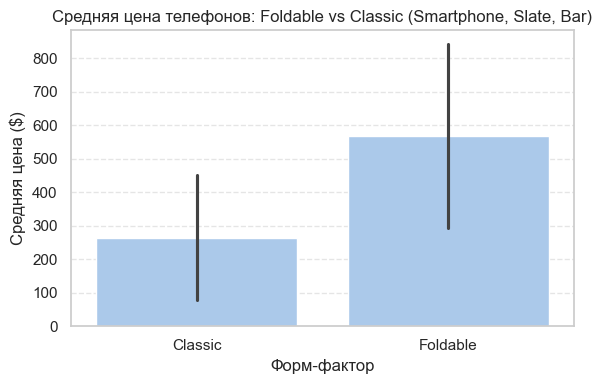

In [284]:
flip_group = ['Foldable Screen']
classic_group = ['Smartphone', 'Slate', 'Bar']

# Создаем новую колонку с группой
data['form_factor_simple'] = np.where(
    data['phone_from_factor'].isin(flip_group), 'Foldable',
    np.where(data['phone_from_factor'].isin(classic_group), 'Classic', None)
)

# Оставляем только нужные группы
plot_ff = data[data['form_factor_simple'].isin(['Foldable', 'Classic'])]

# Строим барплот
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_ff, x='form_factor_simple', y='price_num', estimator='mean', errorbar='sd')
plt.title('Средняя цена телефонов: Foldable vs Classic (Smartphone, Slate, Bar)')
plt.xlabel('Форм-фактор')
plt.ylabel('Средняя цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

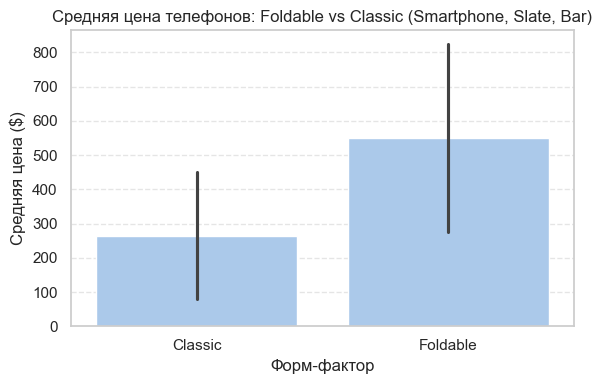

In [285]:
flip_group = ['Foldable Screen', 'Foldable']
classic_group = ['Smartphone', 'Slate', 'Bar']

# Создаем новую колонку с группой
data['form_factor_simple'] = np.where(
    data['phone_from_factor'].isin(flip_group), 'Foldable',
    np.where(data['phone_from_factor'].isin(classic_group), 'Classic', None)
)

# Оставляем только нужные группы
plot_ff = data[data['form_factor_simple'].isin(['Foldable', 'Classic'])]

# Строим барплот
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_ff, x='form_factor_simple', y='price_num', estimator='mean', errorbar='sd')
plt.title('Средняя цена телефонов: Foldable vs Classic (Smartphone, Slate, Bar)')
plt.xlabel('Форм-фактор')
plt.ylabel('Средняя цена ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()